In [2]:
!pip install git+https://github.com/reac2/Tiny

  Cloning https://github.com/reac2/Tiny to /tmp/pip-req-build-ep9gdpwf
  Running command git clone --filter=blob:none --quiet https://github.com/reac2/Tiny /tmp/pip-req-build-ep9gdpwf
  Resolved https://github.com/reac2/Tiny to commit 0dee361c127f4664cb432da09230c4dc7a63e8fb
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.8 MB/s eta 0:00:00
  Created wheel for tinymltoolkit: filename=tinymltoolkit-0.1-py3-none-any.whl size=7235 sha256=0fba6d4ebec332db5886956e1a58059177ad10e08ec21241f9b32082b457ce8b
  Stored in directory: /tmp/pip-ephem-wheel-cache-4fz82ze7/wheels/7a/6f/1b/5c5785c2ea15bb5c5d06cf201d0cb69789ec7f7833

### Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

### Getting data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

### Checking data

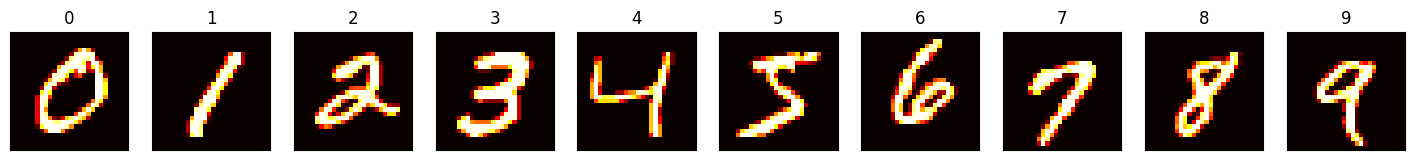

In [3]:
plt.figure(figsize=(18, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(i)
    plt.imshow(X_train[y_train==i][0].reshape(28,28), cmap = 'hot')

### Preprocessing data

In [4]:
# Scale images between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

# One-Hot encode labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

### Define model

In [5]:
model = tf.keras.Sequential([
    layers.Input(shape=X_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    # Return probabilities
    layers.Dense(10, activation='softmax')
])

### Compile and train model

In [6]:
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
      metrics=['accuracy']
  )

  model.fit(
      X_train,
      y_train,
      epochs=10,
      validation_split=0.2,
  )

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.5576 - accuracy: 0.8538 - val_loss: 0.2507 - val_accuracy: 0.9328
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2292 - accuracy: 0.9351 - val_loss: 0.1902 - val_accuracy: 0.9459
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1757 - accuracy: 0.9502 - val_loss: 0.1579 - val_accuracy: 0.9564
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1420 - accuracy: 0.9603 - val_loss: 0.1412 - val_accuracy: 0.9593
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1193 - accuracy: 0.9664 - val_loss: 0.1289 - val_accuracy: 0.9627
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1009 - accuracy: 0.9718 - val_loss: 0.1125 - val_accuracy: 0.9670
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0870 - accuracy: 0.9754 - val_loss: 0.1112 - val_accurac

### Prune and quantize the model using the prune_quantize_save_model


In [7]:
from tinymltoolkit.network_shrinker import prune_quantize_save_model

prune_quantize_save_model(
    model=model,
    X=X_train,
    y=y_train,
    path_to_tflite_model = 'quantised_model.tflite'
  )

Epoch 1/5
53/53 [==============================] - 4s 38ms/step - loss: 0.6908 - accuracy: 0.7294 - val_loss: 0.5787 - val_accuracy: 0.7912
Epoch 2/5
53/53 [==============================] - 2s 35ms/step - loss: 0.5183 - accuracy: 0.8154 - val_loss: 0.4481 - val_accuracy: 0.8537
Epoch 3/5
53/53 [==============================] - 2s 41ms/step - loss: 0.4122 - accuracy: 0.8701 - val_loss: 0.3669 - val_accuracy: 0.8955
Epoch 4/5
53/53 [==============================] - 2s 43ms/step - loss: 0.3444 - accuracy: 0.9037 - val_loss: 0.3142 - val_accuracy: 0.9228
Epoch 5/5
53/53 [==============================] - 2s 35ms/step - loss: 0.2991 - accuracy: 0.9251 - val_loss: 0.2781 - val_accuracy: 0.9388
Epoch 1/3
53/53 [==============================] - 2s 24ms/step - loss: 0.2488 - accuracy: 0.9496 - val_loss: 0.2113 - val_accuracy: 0.9608
Epoch 2/3
53/53 [==============================] - 1s 20ms/step - loss: 0.1974 - accuracy: 0.9651 - val_loss: 0.1872 - val_accuracy: 0.9662
Epoch 3/3
53/53 [===

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:789: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


### Save the original model as a tflite with no optimisations to compare accuracy

In [8]:
from tinymltoolkit.network_shrinker import save_keras_as_tflite_base

save_keras_as_tflite_base(
    model=model,
    path_to_tflite_model='base_model.tflite'
)

### Test accuracy of both models

In [9]:
from tinymltoolkit.network_shrinker import  run_tflite_model, get_tflite_model_size

quantized_pred = run_tflite_model('quantised_model.tflite', X_test)

base_pred = run_tflite_model('base_model.tflite', X_test)

quantized_accuracy = np.mean(quantized_pred.argmax(1) == y_test.argmax(1))

base_accuracy = np.mean(base_pred.argmax(1) == y_test.argmax(1))

print(f"\nQuantized accuracy: {quantized_accuracy:.2f}, size: {get_tflite_model_size('quantised_model.tflite'):.2f} mb")
print(f"Base accuracy: {base_accuracy:.2f}, size: {get_tflite_model_size('base_model.tflite'):.2f} mb")

100%|██████████| 10000/10000 [00:00<00:00, 35186.05it/s]


Quantized accuracy: 0.96, size: 0.18 mb
Base accuracy: 0.92, size: 0.70 mb
